# Data Cleaning

## 1. Loading the Data

In [281]:
import pandas as pd
import numpy as np

In [282]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [283]:
forest_area = pd.read_csv("dataset/Forest Area.csv")
freshwater = pd.read_csv("dataset/Freshwater.csv", skiprows=3)
governance = pd.read_csv("dataset/Governance.csv")
human_development_index = pd.read_csv("dataset/human-development-index.csv")
sustainable_energy = pd.read_csv("dataset/Sustainable energy for all.csv", skiprows=3)
emissions = pd.read_csv("dataset/trends_in_greenhouse_gas_emissions.csv", skiprows=3)

## 2. Choosing Relevant Variables

This is done based on the theoretical framework. As the datasets I have mostly encompasses a wide range of different variables, I will be omitting the ones that are not used and also take the most recent data only.

### Forest Area - 2020 Forest Area

In [284]:
# Forest area
forest_area_filtered = forest_area[['Country and Area', 'Forest Area as a Proportion of (%) Total Land Area, 2020']]
forest_area_filtered = forest_area_filtered.rename(columns={'Country and Area': 'Country'})
forest_area_filtered.head()

,Country,"Forest Area as a Proportion of (%) Total Land Area, 2020"
0,WORLD,31.13
1,Afghanistan,1.85
2,Albania,28.79
3,Algeria,0.82
4,American Samoa,85.65


### Freshwater

In [285]:
freshwater_filtered = freshwater[['Country', 'Internal renewable freshwater resources flows 2020']]
freshwater_filtered.head()

,Country,Internal renewable freshwater resources flows 2020
0,Afghanistan,47.2
1,Albania,26.9
2,Algeria,11.2
3,American Samoa,..
4,Andorra,0.3


### Governance

In [286]:
governance_filtered = governance[['Country and area', 'Paris Agreement', 'UN Framework Convention on Climate Change']]
governance_filtered = governance_filtered.rename(columns={'Country and area': 'Country'})
governance_filtered.head()

,Country,Paris Agreement,UN Framework Convention on Climate Change
0,Afghanistan,2017,2002
1,Albania,2016,1994
2,Algeria,2016,1993
3,Andorra,2017,2011
4,Angola,...,2000


### Human Development Index

In [287]:
human_development_index_filtered = human_development_index.loc[human_development_index['Year'] == 2022]
human_development_index_filtered = human_development_index_filtered[['Entity', 'Human Development Index']]
human_development_index_filtered = human_development_index_filtered.rename(columns={'Entity': 'Country'})
human_development_index_filtered.head()

,Country,Human Development Index
32,Afghanistan,0.462
65,Albania,0.789
98,Algeria,0.745
121,Andorra,0.884
145,Angola,0.591


### Sustainable Energy

In [288]:
sustainable_energy_filtered = sustainable_energy[['Country', 'Access to clean fuels and technologies for cooking 2021', 'Renewable energy consumption 2020']]
sustainable_energy_filtered.head()

,Country,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020
0,Afghanistan,35.4,17.6
1,Albania,83.7,44.6
2,Algeria,99.7,0.2
3,American Samoa,..,0.5
4,Andorra,100,21.9


### Emissions

In [289]:
emissions_filtered = emissions[['Country', 'Carbon dioxide emissions 2020', 'Methane emissions 2020', 'Nitrous oxide emissions 2020']]
emissions_filtered.head()

,Country,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,8709.47,16222.03596,4863.386801
1,Albania,4383.2,2692.195886,1015.186729
2,Algeria,161563,86543.92362,12578.7476
3,American Samoa,..,..,..
4,Andorra,448.884399,53.600959,1.758811


## 3. Merge Datasets

Remove unnecessary rows after last country (Zimbabwe) for Freshwater, Sustainable Energy, and Emissions dataset

In [290]:
freshwater_filtered = freshwater_filtered.loc[:freshwater_filtered[freshwater_filtered['Country'] == 'Zimbabwe'].index[0]]
freshwater_filtered

,Country,Internal renewable freshwater resources flows 2020
0,Afghanistan,47.2
1,Albania,26.9
2,Algeria,11.2
3,American Samoa,..
4,Andorra,0.3
5,Angola,148
6,Antigua and Barbuda,0.1
7,Argentina,292
8,Armenia,6.9
9,Aruba,..


In [291]:
sustainable_energy_filtered = sustainable_energy_filtered.loc[:sustainable_energy_filtered[sustainable_energy_filtered['Country'] == 'Zimbabwe'].index[0]]
sustainable_energy_filtered

,Country,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020
0,Afghanistan,35.4,17.6
1,Albania,83.7,44.6
2,Algeria,99.7,0.2
3,American Samoa,..,0.5
4,Andorra,100,21.9
5,Angola,50,61
6,Antigua and Barbuda,100,0.7
7,Argentina,99.9,9.8
8,Armenia,98.4,8.4
9,Aruba,..,8.7


In [292]:
emissions_filtered = emissions_filtered.loc[:emissions_filtered[emissions_filtered['Country'] == 'Zimbabwe'].index[0]]
emissions_filtered

,Country,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,8709.47,16222.03596,4863.386801
1,Albania,4383.2,2692.195886,1015.186729
2,Algeria,161563,86543.92362,12578.7476
3,American Samoa,..,..,..
4,Andorra,448.884399,53.600959,1.758811
5,Angola,19814.5,32703.23811,17757.86784
6,Antigua and Barbuda,474.6,204.865822,11.763473
7,Argentina,154535.9,131035.6894,51061.49889
8,Armenia,6746.6,2319.921617,1173.579946
9,Aruba,..,..,..


Get standardised country names map to merge data into one CSV file as each datasets might have different conventions on naming the countries. 

I did this with the help of GPT-4, but it was not entirely accurate so I also had to input some of the key-value pairs manually.

In [293]:
country_name_mapping = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Brunei": "Brunei Darussalam",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Democratic Republic of the": "Democratic Republic of the Congo",
    "The Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "Congo, Rep.": "Congo",
    "Congo, Republic of": "Congo",
    "Cape Verde": "Cabo Verde",
    "Cote d'Ivoire": "Côte d’Ivoire",
    "Ivory Coast": "Côte d’Ivoire",
    "Czech Republic": "Czechia",
    "Gambia, The": "Gambia",
    "Korea, Rep.": "Republic of Korea",
    "Korea, Republic of": "Republic of Korea",
    "South Korea": "Republic of Korea",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Iran": "Iran (Islamic Republic of)",
    "Lao PDR": "Lao People's Democratic Republic",
    "Lao": "Lao People's Democratic Republic",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Micronesia": "Micronesia (Federated States of)",
    "Micronesia (country)": "Micronesia (Federated States of)",
    "Moldova": "Republic of Moldova",
    "Palestine, State of": "State of Palestine",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Turkiye": "Turkey",
    "Tanzania": "United Republic of Tanzania",
    "Venezuela, RB": "Venezuela",
    "Yemen, Rep.": "Yemen",
    "Syria": "Syrian Arab Republic",
    "Egypt, Arab Rep.": "Egypt",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Slovak Republic": "Slovakia",
    "Russia": "Russian Federation",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "United States": "United States of America",
    "East Timor": "Timor-Leste",
    "Vietnam": "Viet Nam",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "West Bank and Gaza": "State of Palestine",
    "Palestine": "State of Palestine",
}

In [294]:
print("Forest Area: ", len(forest_area_filtered))
print("Freshwater: ", len(freshwater_filtered))
print("Governance: ", len(governance_filtered))
print("HDI: ", len(human_development_index_filtered))
print("Sustainable Energy: ", len(sustainable_energy_filtered))
print("Emissions: ", len(emissions_filtered))

Forest Area:  237
Freshwater:  214
Governance:  194
HDI:  204
Sustainable Energy:  214
Emissions:  214


As the Governance dataset has the least amount of countries, I'm going to use countries from the Governance dataset as the base country list for the merged data.

In [295]:
countries_list = governance_filtered['Country'].unique()
countries_list

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'G

Map the country names from other datasets to match the country name in the Governance dataset.

In [296]:
forest_area_filtered.loc[:, 'Country'] = forest_area_filtered['Country'].replace(country_name_mapping)
forest_area_filtered = forest_area_filtered[forest_area_filtered['Country'].isin(countries_list)]
len(forest_area_filtered)

194

In [297]:
freshwater_filtered.loc[:, 'Country'] = freshwater_filtered['Country'].replace(country_name_mapping)
freshwater_filtered = freshwater_filtered[freshwater_filtered['Country'].isin(countries_list)]
len(freshwater_filtered)

193

In [298]:
human_development_index_filtered.loc[:, 'Country'] = human_development_index_filtered['Country'].replace(country_name_mapping)
human_development_index_filtered = human_development_index_filtered[human_development_index_filtered['Country'].isin(countries_list)]
len(human_development_index_filtered)

192

In [299]:
sustainable_energy_filtered.loc[:, 'Country'] = sustainable_energy_filtered['Country'].replace(country_name_mapping)
sustainable_energy_filtered = sustainable_energy_filtered[sustainable_energy_filtered['Country'].isin(countries_list)]
len(sustainable_energy_filtered)

193

In [300]:
emissions_filtered.loc[:, 'Country'] = emissions_filtered['Country'].replace(country_name_mapping)
emissions_filtered = emissions_filtered[emissions_filtered['Country'].isin(countries_list)]
len(emissions_filtered)

193

In [301]:
freshwater_countries = freshwater_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(freshwater_countries))
missing_countries

['Nauru']

Input missing country rows with null value to the dataset

In [302]:
nauru_df = pd.DataFrame([['Nauru', np.nan]], columns=['Country', 'Internal renewable freshwater resources flows 2020'])
freshwater_filtered = pd.concat([freshwater_filtered, nauru_df], ignore_index=True)

In [303]:
sustainable_energy_countries = sustainable_energy_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(sustainable_energy_countries))
missing_countries

['Nauru']

In [304]:
nauru_df = pd.DataFrame([['Nauru', np.nan, np.nan]], columns=['Country', 'Access to clean fuels and technologies for cooking 2021', 'Renewable energy consumption 2020'])
sustainable_energy_filtered = pd.concat([sustainable_energy_filtered, nauru_df], ignore_index=True)

In [305]:
emissions_countries = emissions_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(emissions_countries))
missing_countries

['Nauru']

In [306]:
nauru_df = pd.DataFrame([['Nauru', np.nan, np.nan, np.nan]], columns=['Country', 'Carbon dioxide emissions 2020', 'Methane emissions 2020', 'Nitrous oxide emissions 2020'])
emissions_filtered = pd.concat([emissions_filtered, nauru_df], ignore_index=True)

In [307]:
hdi_countries = human_development_index_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(hdi_countries))
missing_countries

['Monaco', "Democratic People's Republic of Korea"]

In [308]:
monaco_df = pd.DataFrame([['Monaco', np.nan]], columns=['Country', 'Human Development Index'])
dprk_df = pd.DataFrame([["Democratic People's Republic of Korea", np.nan]], columns=['Country', 'Human Development Index'])
human_development_index_filtered = pd.concat([human_development_index_filtered, monaco_df, dprk_df], ignore_index=True)

So in conclusion, I am going to have a total of 194 countries included in the data after inputting the missing countries for each dataset.

Add regional groups data

In [309]:
regional_groups = pd.read_csv("dataset/un-regional-groups.csv")
regional_groups = regional_groups.rename(columns={'Name': 'Country'})
regional_groups = regional_groups[['Country', 'Region']]

In [310]:
from functools import reduce

In [311]:
dfs = [regional_groups, forest_area_filtered, freshwater_filtered, governance_filtered, human_development_index_filtered, sustainable_energy_filtered, emissions_filtered]
merge_dfs = lambda left, right: pd.merge(left, right, on='Country', how='inner')
lcdi_df = reduce(merge_dfs, dfs)
lcdi_df

,Country,Region,"Forest Area as a Proportion of (%) Total Land Area, 2020",Internal renewable freshwater resources flows 2020,Paris Agreement,UN Framework Convention on Climate Change,Human Development Index,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Algeria,African Group,0.82,11.2,2016,1993,0.745,99.7,0.2,161563,86543.92362,12578.7476
1,Angola,African Group,53.43,148,...,2000,0.591,50,61,19814.5,32703.23811,17757.86784
2,Benin,African Group,27.80,10.3,2016,1994,0.504,4.6,46.2,7980.4,4029.619412,3007.644632
3,Botswana,African Group,26.92,2.4,2016,1994,0.708,65.7,27.2,5763.687,3434.49382,2963.633551
4,Burkina Faso,African Group,22.72,12.5,2016,1993,0.438,11.7,67.5,5456.7,15408.27314,10060.67193
5,Burundi,African Group,10.89,10.1,...,1997,0.420,0.2,83.5,713.466,1258.19152,1636.389411
6,Cabo Verde,African Group,11.34,0.3,2017,1995,0.661,81.8,23.4,620.6,93.207601,59.475638
7,Cameroon,African Group,43.03,273,2016,1994,0.587,22.8,78.9,9928.4,17797.74545,62399.45337
8,Central African Republic,African Group,35.80,141,2016,1995,0.387,0.9,90.9,236.6,10108.5047,10628.57907
9,Chad,African Group,3.43,15,2017,1994,0.394,8,73.6,1568.4,59438.92298,27724.59116


Rename column headings for consistency

In [312]:
lcdi_df = lcdi_df.rename(columns={'Country': 'country'})
lcdi_df = lcdi_df.rename(columns={'Forest Area as a Proportion of (%) Total Land Area, 2020': 'forest_area'})
lcdi_df = lcdi_df.rename(columns={'Internal renewable freshwater resources flows 2020': 'freshwater'})
lcdi_df = lcdi_df.rename(columns={'Paris Agreement': 'paris_agreement'})
lcdi_df = lcdi_df.rename(columns={'UN Framework Convention on Climate Change': 'unfccc'})
lcdi_df = lcdi_df.rename(columns={'Human Development Index': 'hdi'})
lcdi_df = lcdi_df.rename(columns={'Access to clean fuels and technologies for cooking 2021': 'cooking_clean_fuel_and_technologies_access'})
lcdi_df = lcdi_df.rename(columns={'Renewable energy consumption 2020': 'renewable_energy_consumption'})
lcdi_df = lcdi_df.rename(columns={'Carbon dioxide emissions 2020': 'co2_emissions'})
lcdi_df = lcdi_df.rename(columns={'Methane emissions 2020': 'methane_emissions'})
lcdi_df = lcdi_df.rename(columns={'Nitrous oxide emissions 2020': 'nitrous_oxide_emissions'})
lcdi_df = lcdi_df.rename(columns={'Region': 'region'})


Change UNFCCC data from year to year since joined

In [313]:
current_year = 2024
lcdi_df["unfccc"] = current_year - lcdi_df['unfccc']
lcdi_df = lcdi_df.rename(columns={'unfccc': 'years_since_unfccc'})
lcdi_df

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,0.82,11.2,2016,31,0.745,99.7,0.2,161563,86543.92362,12578.7476
1,Angola,African Group,53.43,148,...,24,0.591,50,61,19814.5,32703.23811,17757.86784
2,Benin,African Group,27.80,10.3,2016,30,0.504,4.6,46.2,7980.4,4029.619412,3007.644632
3,Botswana,African Group,26.92,2.4,2016,30,0.708,65.7,27.2,5763.687,3434.49382,2963.633551
4,Burkina Faso,African Group,22.72,12.5,2016,31,0.438,11.7,67.5,5456.7,15408.27314,10060.67193
5,Burundi,African Group,10.89,10.1,...,27,0.420,0.2,83.5,713.466,1258.19152,1636.389411
6,Cabo Verde,African Group,11.34,0.3,2017,29,0.661,81.8,23.4,620.6,93.207601,59.475638
7,Cameroon,African Group,43.03,273,2016,30,0.587,22.8,78.9,9928.4,17797.74545,62399.45337
8,Central African Republic,African Group,35.80,141,2016,29,0.387,0.9,90.9,236.6,10108.5047,10628.57907
9,Chad,African Group,3.43,15,2017,30,0.394,8,73.6,1568.4,59438.92298,27724.59116


Delete Turkey from WEOG as there are two entries in two different regions. It will be included in the Asia-Pacific Group.

In [314]:
lcdi_df = lcdi_df[~((lcdi_df['country'] == 'Turkey') & (lcdi_df['region'] == 'WEOG'))]

## 4. Handling Missing Values

In [315]:
lcdi_df.dtypes

country                                        object
region                                         object
forest_area                                   float64
freshwater                                     object
paris_agreement                                object
years_since_unfccc                              int64
hdi                                           float64
cooking_clean_fuel_and_technologies_access     object
renewable_energy_consumption                   object
co2_emissions                                  object
methane_emissions                              object
nitrous_oxide_emissions                        object
dtype: object

Handle missing values in columns by marking it as NaN and convert to suitable type

In [316]:
lcdi_df.loc[lcdi_df["freshwater"] == "..", "freshwater"] = np.nan
lcdi_df.loc[:, "freshwater"] = lcdi_df["freshwater"].astype(float)

* One hot encode the Paris Agreement (0: not agreed, 1: agreed)

In [317]:
lcdi_df.loc[lcdi_df["paris_agreement"] == "...", "paris_agreement"] = 0
lcdi_df.loc[:, "paris_agreement"] = lcdi_df["paris_agreement"].apply(lambda x: 1 if x != 0 else 0)

In [318]:
lcdi_df.loc[lcdi_df["cooking_clean_fuel_and_technologies_access"] == "..", "cooking_clean_fuel_and_technologies_access"] = np.nan
lcdi_df.loc[:, "cooking_clean_fuel_and_technologies_access"] = lcdi_df["cooking_clean_fuel_and_technologies_access"].astype(float)

In [319]:
lcdi_df.loc[lcdi_df["renewable_energy_consumption"] == "..", "renewable_energy_consumption"] = np.nan
lcdi_df.loc[:, "renewable_energy_consumption"] = lcdi_df["renewable_energy_consumption"].astype(float)

In [320]:
lcdi_df.loc[lcdi_df["co2_emissions"] == "..", "co2_emissions"] = np.nan
lcdi_df.loc[:, "co2_emissions"] = lcdi_df["co2_emissions"].astype(float)


In [321]:
lcdi_df.loc[lcdi_df["methane_emissions"] == "..", "methane_emissions"] = np.nan
lcdi_df.loc[:, "methane_emissions"] = lcdi_df["methane_emissions"].astype(float)


In [322]:
lcdi_df.loc[lcdi_df["nitrous_oxide_emissions"] == "..", "nitrous_oxide_emissions"] = np.nan
lcdi_df.loc[:, "nitrous_oxide_emissions"] = lcdi_df["nitrous_oxide_emissions"].astype(float)

In [323]:
lcdi_df.isnull().sum()

country                                        0
region                                         0
forest_area                                    0
freshwater                                    13
paris_agreement                                0
years_since_unfccc                             0
hdi                                            2
cooking_clean_fuel_and_technologies_access     6
renewable_energy_consumption                   3
co2_emissions                                  4
methane_emissions                              4
nitrous_oxide_emissions                        4
dtype: int64

In [324]:
lcdi_df.dtypes

country                                        object
region                                         object
forest_area                                   float64
freshwater                                     object
paris_agreement                                object
years_since_unfccc                              int64
hdi                                           float64
cooking_clean_fuel_and_technologies_access     object
renewable_energy_consumption                   object
co2_emissions                                  object
methane_emissions                              object
nitrous_oxide_emissions                        object
dtype: object

In [325]:
# Filter rows where freshwater is empty
freshwater_missing = lcdi_df[lcdi_df['freshwater'].isnull()]
freshwater_missing


,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
41,Seychelles,African Group,73.26,NaN,1,32,0.802,100.0,1.3,598.7,94.696179,4.039156
71,Kiribati,Asia-Pacific Group,1.46,NaN,1,29,0.628,12.4,42.8,56.9,23.209951,5.124415
78,Marshall Islands,Asia-Pacific Group,52.22,NaN,1,32,0.731,66.7,12.0,110.0,31.91103,0.699535
79,Micronesia (Federated States of),Asia-Pacific Group,92.03,NaN,1,31,0.634,13.3,2.0,107.5,52.686594,27.549723
82,Nauru,Asia-Pacific Group,0.00,NaN,1,31,0.696,NaN,NaN,NaN,NaN,NaN
86,Palau,Asia-Pacific Group,90.02,NaN,1,25,0.797,43.0,0.9,158.2,19.526302,0.0
92,Samoa,Asia-Pacific Group,57.13,NaN,1,30,0.702,37.2,37.5,206.5,267.323935,50.494426
101,Tonga,Asia-Pacific Group,12.43,NaN,1,26,0.739,86.8,1.9,118.1,92.338189,52.268669
104,Tuvalu,Asia-Pacific Group,33.33,NaN,1,31,0.653,74.6,6.7,6.6,11.574492,1.443188
123,Montenegro,Eastern European Group,61.49,NaN,1,18,0.844,62.0,39.6,2527.2,783.237121,150.663183


In [326]:
hdi_missing = lcdi_df[lcdi_df['hdi'].isnull()]
hdi_missing

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
62,Democratic People's Republic of Korea,Asia-Pacific Group,50.08,67.0,1,30,NaN,12.5,12.7,52437.2,18145.48138,2590.047636
182,Monaco,WEOG,0.00,NaN,1,32,NaN,100.0,NaN,NaN,NaN,NaN


In [327]:
clean_fuel_missing = lcdi_df[lcdi_df['cooking_clean_fuel_and_technologies_access'].isnull()]
clean_fuel_missing

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
27,Libya,African Group,0.12,0.7,0,25,0.746,NaN,3.1,44467.0,24033.12005,1797.652497
75,Lebanon,Asia-Pacific Group,14.01,4.8,0,30,0.723,NaN,6.7,21474.9,3459.013432,846.613935
82,Nauru,Asia-Pacific Group,0.00,NaN,1,31,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,1.68,0.8,1,9,0.716,NaN,15.0,NaN,NaN,NaN
115,Bulgaria,Eastern European Group,35.86,21.0,1,29,0.799,NaN,21.1,34138.1,6980.496622,4328.729643
179,Liechtenstein,WEOG,41.88,NaN,1,30,0.942,NaN,55.2,141.996093,2.588257,0.870988


In [328]:
renewable_energy_missing = lcdi_df[lcdi_df['renewable_energy_consumption'].isnull()]
renewable_energy_missing

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,1,31,0.696,NaN,NaN,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,1,32,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,16.67,NaN,1,30,0.867,100.0,NaN,NaN,NaN,NaN


In [329]:
co2_missing = lcdi_df[lcdi_df['co2_emissions'].isnull()]
co2_missing

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,1,31,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,1.68,0.8,1,9,0.716,NaN,15.0,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,1,32,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,16.67,NaN,1,30,0.867,100.0,NaN,NaN,NaN,NaN


In [330]:
methane_missing = lcdi_df[lcdi_df['methane_emissions'].isnull()]
methane_missing

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,1,31,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,1.68,0.8,1,9,0.716,NaN,15.0,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,1,32,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,16.67,NaN,1,30,0.867,100.0,NaN,NaN,NaN,NaN


In [331]:
nitrous_oxide_missing = lcdi_df[lcdi_df['nitrous_oxide_emissions'].isnull()]
nitrous_oxide_missing

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,1,31,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,1.68,0.8,1,9,0.716,NaN,15.0,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,1,32,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,16.67,NaN,1,30,0.867,100.0,NaN,NaN,NaN,NaN


### Imputation of Missing Values

In [332]:
lcdi_df.isnull().sum()

country                                        0
region                                         0
forest_area                                    0
freshwater                                    13
paris_agreement                                0
years_since_unfccc                             0
hdi                                            2
cooking_clean_fuel_and_technologies_access     6
renewable_energy_consumption                   3
co2_emissions                                  4
methane_emissions                              4
nitrous_oxide_emissions                        4
dtype: int64

Remove countries with more than 50% columns missing in crucial variables for the index, which are columns that relates to the environmental aspect

In [333]:
environmental_related_columns = [
    "cooking_clean_fuel_and_technologies_access", 
    "renewable_energy_consumption", 
    "co2_emissions", 
    "methane_emissions", 
    "nitrous_oxide_emissions",
    "freshwater",
    "forest_area"
]

threshold = 4

missing_counts = lcdi_df[environmental_related_columns].isnull().sum(axis=1)

lcdi_df_filtered = lcdi_df[missing_counts <= threshold] 

dropped_countries = lcdi_df.loc[missing_counts > threshold, 'country'] 
print(f"Dropped countries due to excessive missing data: {list(dropped_countries)}")

lcdi_df_filtered = lcdi_df_filtered.reset_index(drop=True)

lcdi_df_filtered

Dropped countries due to excessive missing data: ['Nauru', 'Monaco', 'San Marino']


,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,0.82,11.2,1,31,0.745,99.7,0.2,161563.0,86543.92362,12578.7476
1,Angola,African Group,53.43,148.0,0,24,0.591,50.0,61.0,19814.5,32703.23811,17757.86784
2,Benin,African Group,27.80,10.3,1,30,0.504,4.6,46.2,7980.4,4029.619412,3007.644632
3,Botswana,African Group,26.92,2.4,1,30,0.708,65.7,27.2,5763.687,3434.49382,2963.633551
4,Burkina Faso,African Group,22.72,12.5,1,31,0.438,11.7,67.5,5456.7,15408.27314,10060.67193
5,Burundi,African Group,10.89,10.1,0,27,0.420,0.2,83.5,713.466,1258.19152,1636.389411
6,Cabo Verde,African Group,11.34,0.3,1,29,0.661,81.8,23.4,620.6,93.207601,59.475638
7,Cameroon,African Group,43.03,273.0,1,30,0.587,22.8,78.9,9928.4,17797.74545,62399.45337
8,Central African Republic,African Group,35.80,141.0,1,29,0.387,0.9,90.9,236.6,10108.5047,10628.57907
9,Chad,African Group,3.43,15.0,1,30,0.394,8.0,73.6,1568.4,59438.92298,27724.59116


For the imputation of missing values, I decided to use the MICE algorithm due to it being a robust, informative method of dealing with missing data in datasets.

In [334]:
from fancyimpute import IterativeImputer 

In [335]:
mice_imputer = IterativeImputer() 
lcdi_df_imputed = mice_imputer.fit_transform(lcdi_df_filtered.iloc[:, 2:])
lcdi_df_imputed = pd.DataFrame(lcdi_df_imputed, columns=lcdi_df_filtered.columns[2:])
lcdi_df_imputed.insert(0, "country", lcdi_df_filtered["country"])
lcdi_df_imputed.insert(1, "region", lcdi_df_filtered["region"])

In [336]:
differences = lcdi_df_filtered.compare(lcdi_df_imputed)
differences['country'] = lcdi_df_filtered['country']

differences

freshwater             hdi            \
          self      other self     other   
27         NaN        NaN  NaN       NaN   
41         NaN  21.558329  NaN       NaN   
62         NaN        NaN  NaN  0.553526   
71         NaN  21.348855  NaN       NaN   
75         NaN        NaN  NaN       NaN   
78         NaN  21.381735  NaN       NaN   
79         NaN  21.526198  NaN       NaN   
85         NaN  21.280690  NaN       NaN   
88         NaN        NaN  NaN       NaN   
91         NaN  22.865960  NaN       NaN   
100        NaN  21.781128  NaN       NaN   
103        NaN  21.298899  NaN       NaN   
114        NaN        NaN  NaN       NaN   
122        NaN  25.124881  NaN       NaN   
178        NaN  21.177804  NaN       NaN   

    cooking_clean_fuel_and_technologies_access            co2_emissions  \
                                          self      other          self   
27                                         NaN  91.415089           NaN   
41                                         NaN        NaN           NaN   
62                                         NaN        NaN           NaN   
71                                         NaN        NaN           NaN   
75                                         NaN  91.462818           NaN   
78                                         NaN        NaN           NaN   
79                                         NaN        NaN           NaN   
85                                         NaN        NaN           NaN   
88                                         NaN  75.058299           NaN   
91                                         NaN        NaN           NaN   
100                                        NaN        NaN           NaN   
103                                        NaN        NaN           NaN   
114                                        NaN  77.567881           NaN   
122                                        NaN        NaN           NaN   
178                                        NaN  46.559618           NaN   

                   methane_emissions               nitrous_oxide_emissions  \
             other              self         other                    self   
27             NaN               NaN           NaN                     NaN   
41             NaN               NaN           NaN                     NaN   
62             NaN               NaN           NaN                     NaN   
71             NaN               NaN           NaN                     NaN   
75             NaN               NaN           NaN                     NaN   
78             NaN               NaN           NaN                     NaN   
79             NaN               NaN           NaN                     NaN   
85             NaN               NaN           NaN                     NaN   
88   152546.109294               NaN  28272.578403                     NaN   
91             NaN               NaN           NaN                     NaN   
100            NaN               NaN           NaN                     NaN   
103            NaN               NaN           NaN                     NaN   
114            NaN               NaN           NaN                     NaN   
122            NaN               NaN           NaN                     NaN   
178            NaN               NaN           NaN                     NaN   

                                                 country  
            other                                         
27            NaN                                  Libya  
41            NaN                             Seychelles  
62            NaN  Democratic People's Republic of Korea  
71            NaN                               Kiribati  
75            NaN                                Lebanon  
78            NaN                       Marshall Islands  
79            NaN       Micronesia (Federated States of)  
85            NaN                                  Palau  
88   11798.819042                     State of Palestine  
91 

In [337]:
lcdi_df_imputed.loc[lcdi_df_imputed['freshwater'] < 0, 'freshwater'] = 0
lcdi_df_imputed.loc[lcdi_df_imputed['cooking_clean_fuel_and_technologies_access'] > 100, 'cooking_clean_fuel_and_technologies_access'] = 100

In [338]:
lcdi_df_imputed

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,0.82,11.200000,1.0,31.0,0.745000,99.700000,0.2,1.615630e+05,8.654392e+04,12578.747600
1,Angola,African Group,53.43,148.000000,0.0,24.0,0.591000,50.000000,61.0,1.981450e+04,3.270324e+04,17757.867840
2,Benin,African Group,27.80,10.300000,1.0,30.0,0.504000,4.600000,46.2,7.980400e+03,4.029619e+03,3007.644632
3,Botswana,African Group,26.92,2.400000,1.0,30.0,0.708000,65.700000,27.2,5.763687e+03,3.434494e+03,2963.633551
4,Burkina Faso,African Group,22.72,12.500000,1.0,31.0,0.438000,11.700000,67.5,5.456700e+03,1.540827e+04,10060.671930
5,Burundi,African Group,10.89,10.100000,0.0,27.0,0.420000,0.200000,83.5,7.134660e+02,1.258192e+03,1636.389411
6,Cabo Verde,African Group,11.34,0.300000,1.0,29.0,0.661000,81.800000,23.4,6.206000e+02,9.320760e+01,59.475638
7,Cameroon,African Group,43.03,273.000000,1.0,30.0,0.587000,22.800000,78.9,9.928400e+03,1.779775e+04,62399.453370
8,Central African Republic,African Group,35.80,141.000000,1.0,29.0,0.387000,0.900000,90.9,2.366000e+02,1.010850e+04,10628.579070
9,Chad,African Group,3.43,15.000000,1.0,30.0,0.394000,8.000000,73.6,1.568400e+03,5.943892e+04,27724.591160


In [339]:
lcdi_df_imputed.isnull().sum()

country                                       0
region                                        0
forest_area                                   0
freshwater                                    0
paris_agreement                               0
years_since_unfccc                            0
hdi                                           0
cooking_clean_fuel_and_technologies_access    0
renewable_energy_consumption                  0
co2_emissions                                 0
methane_emissions                             0
nitrous_oxide_emissions                       0
dtype: int64

In [340]:
import seaborn as sns

# Statistics
lcdi_df_imputed.describe() 

,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
count,190.000000,190.00000,190.000000,190.000000,190.000000,190.000000,190.000000,1.900000e+02,1.900000e+02,190.000000
mean,32.465474,226.42655,0.942105,28.678947,0.720761,67.634546,32.599474,1.709108e+05,4.361869e+04,15863.920579
std,23.939446,671.87620,0.234161,3.682804,0.155551,37.211751,27.725345,8.764720e+05,1.280783e+05,50157.328974
min,0.000000,0.00000,0.000000,9.000000,0.380000,0.000000,0.000000,6.600000e+00,2.588257e+00,0.000000
25%,11.397500,6.37500,1.000000,29.000000,0.601000,35.250000,10.500000,2.637352e+03,2.447562e+03,643.654759
50%,31.340000,27.75000,1.000000,30.000000,0.737500,86.950000,23.850000,1.345640e+04,9.879367e+03,3555.785875
75%,49.602500,126.87500,1.000000,30.750000,0.842500,100.000000,50.050000,6.595338e+04,3.055793e+04,12394.017825
max,97.410000,5661.00000,1.000000,32.000000,0.967000,100.000000,96.200000,1.094469e+07,1.186285e+06,536920.210300


### Checking for Outliers

,country,forest_area


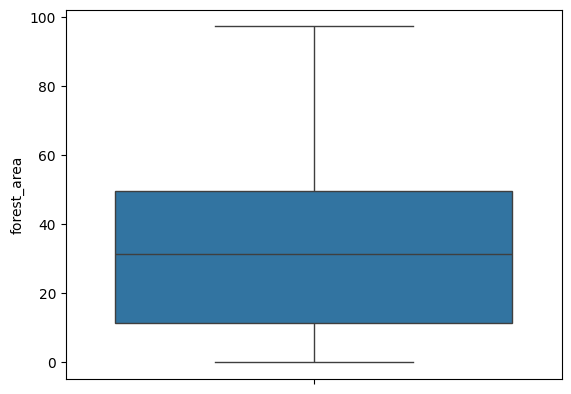

In [341]:
Q1 = lcdi_df_imputed['forest_area'].quantile(0.25)
Q3 = lcdi_df_imputed['forest_area'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['forest_area'] < lower_bound) | (lcdi_df_imputed['forest_area'] > upper_bound)]

sns.boxplot(y="forest_area", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'forest_area']]

,country,freshwater
13,Democratic Republic of the Congo,900.0
28,Madagascar,337.0
60,China,2812.9
64,India,1446.0
65,Indonesia,2018.7
68,Japan,430.0
76,Malaysia,580.0
81,Myanmar,1002.8
86,Papua New Guinea,801.0
87,Philippines,479.0


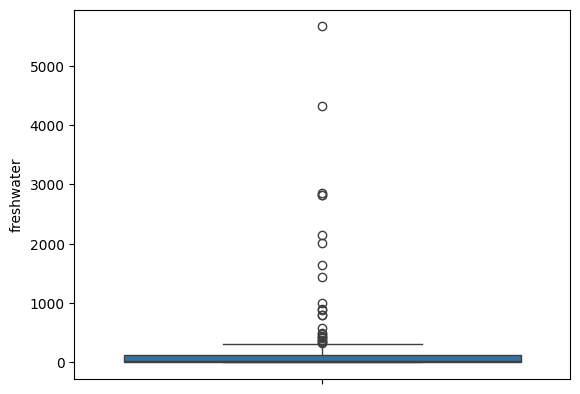

In [342]:
Q1 = lcdi_df_imputed['freshwater'].quantile(0.25)
Q3 = lcdi_df_imputed['freshwater'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['freshwater'] < lower_bound) | (lcdi_df_imputed['freshwater'] > upper_bound)]

sns.boxplot(y="freshwater", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'freshwater']]

,country,hdi


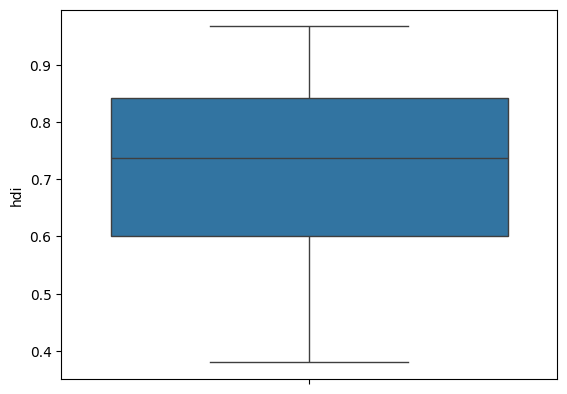

In [343]:
Q1 = lcdi_df_imputed['hdi'].quantile(0.25)
Q3 = lcdi_df_imputed['hdi'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['hdi'] < lower_bound) | (lcdi_df_imputed['hdi'] > upper_bound)]

sns.boxplot(y="hdi", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'hdi']]

,country,cooking_clean_fuel_and_technologies_access


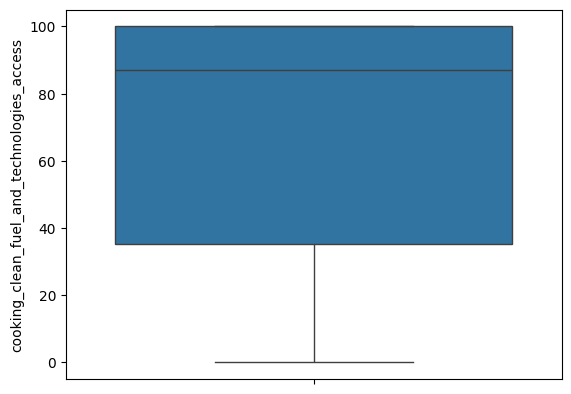

In [344]:
Q1 = lcdi_df_imputed['cooking_clean_fuel_and_technologies_access'].quantile(0.25)
Q3 = lcdi_df_imputed['cooking_clean_fuel_and_technologies_access'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['cooking_clean_fuel_and_technologies_access'] < lower_bound) | (lcdi_df_imputed['cooking_clean_fuel_and_technologies_access'] > upper_bound)]

sns.boxplot(y="cooking_clean_fuel_and_technologies_access", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'cooking_clean_fuel_and_technologies_access']]

,country,renewable_energy_consumption


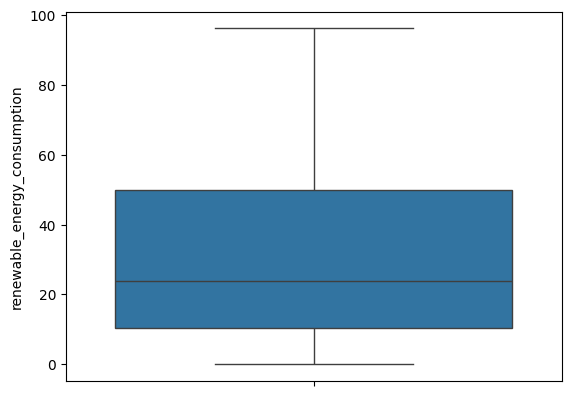

In [345]:
Q1 = lcdi_df_imputed['renewable_energy_consumption'].quantile(0.25)
Q3 = lcdi_df_imputed['renewable_energy_consumption'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['renewable_energy_consumption'] < lower_bound) | (lcdi_df_imputed['renewable_energy_consumption'] > upper_bound)]

sns.boxplot(y="renewable_energy_consumption", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'renewable_energy_consumption']]

,country,co2_emissions
0,Algeria,161563.0
15,Egypt,210752.3
44,South Africa,393241.6
60,China,10944686.2
64,India,2200836.3
65,Indonesia,563197.0
66,Iran (Islamic Republic of),616561.3
67,Iraq,163511.5
68,Japan,1014064.7
70,Kazakhstan,211896.7


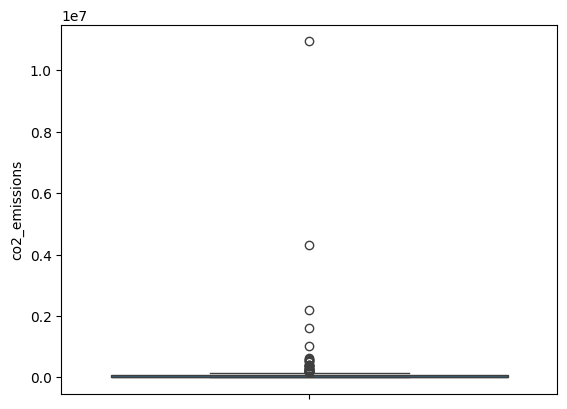

In [346]:
Q1 = lcdi_df_imputed['co2_emissions'].quantile(0.25)
Q3 = lcdi_df_imputed['co2_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['co2_emissions'] < lower_bound) | (lcdi_df_imputed['co2_emissions'] > upper_bound)]

sns.boxplot(y="co2_emissions", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'co2_emissions']]

,country,methane_emissions
0,Algeria,8.654392e+04
18,Ethiopia,9.464558e+04
37,Nigeria,1.510598e+05
56,Bangladesh,8.890400e+04
60,China,1.186285e+06
64,India,6.976547e+05
65,Indonesia,3.339949e+05
66,Iran (Islamic Republic of),1.746420e+05
67,Iraq,8.591697e+04
84,Pakistan,1.694282e+05


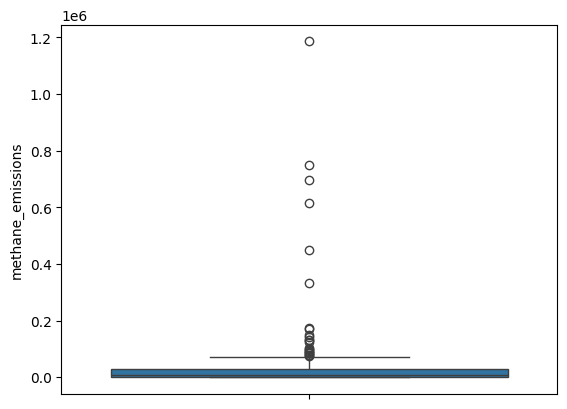

In [347]:
Q1 = lcdi_df_imputed['methane_emissions'].quantile(0.25)
Q3 = lcdi_df_imputed['methane_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['methane_emissions'] < lower_bound) | (lcdi_df_imputed['methane_emissions'] > upper_bound)]

sns.boxplot(y="methane_emissions", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'methane_emissions']]

,country,nitrous_oxide_emissions
7,Cameroon,62399.45337
18,Ethiopia,53761.30355
37,Nigeria,41196.30278
60,China,536920.21030
64,India,279003.79150
65,Indonesia,75595.64259
66,Iran (Islamic Republic of),39719.80826
84,Pakistan,68971.75355
101,Turkey,38132.07296
126,Russian Federation,69231.05118


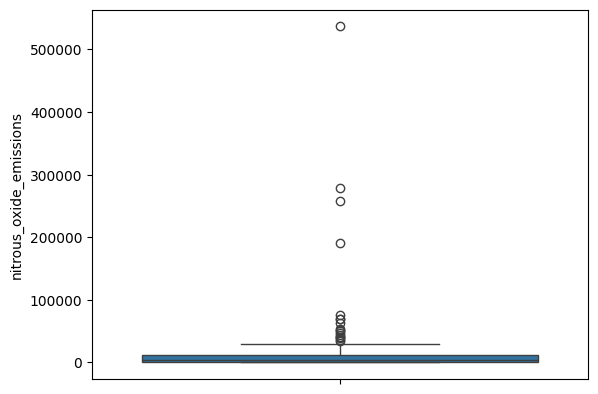

In [348]:
Q1 = lcdi_df_imputed['nitrous_oxide_emissions'].quantile(0.25)
Q3 = lcdi_df_imputed['nitrous_oxide_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdi_df_imputed[(lcdi_df_imputed['nitrous_oxide_emissions'] < lower_bound) | (lcdi_df_imputed['nitrous_oxide_emissions'] > upper_bound)]

sns.boxplot(y="nitrous_oxide_emissions", data=lcdi_df_imputed, showfliers=True)

potential_outliers[['country', 'nitrous_oxide_emissions']]

In [349]:
lcdi_df_imputed.to_csv("lcdi/lcdi.csv", index=False)